<a href="https://colab.research.google.com/github/deegrayce/news_correlation_10ac_week0-/blob/task-1/News_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
news_data = pd.read_csv('/content/drive/MyDrive/rating.csv')
domains_location = pd.read_csv("/content/drive/MyDrive/domains_location.csv")
traffic_data = pd.read_csv("/content/drive/MyDrive/traffic.csv")

In [21]:
# Merge data
merged_data = pd.merge(news_data, domains_location, left_on="source_name", right_on="SourceCommonName", how="left")
merged_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,SourceCommonName,location,Country
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,NaN,NaN,NaN
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,NaN,NaN,NaN
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,NaN,NaN,NaN
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,NaN,NaN,NaN
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral,NaN,NaN,NaN


<Axes: xlabel='source_name'>

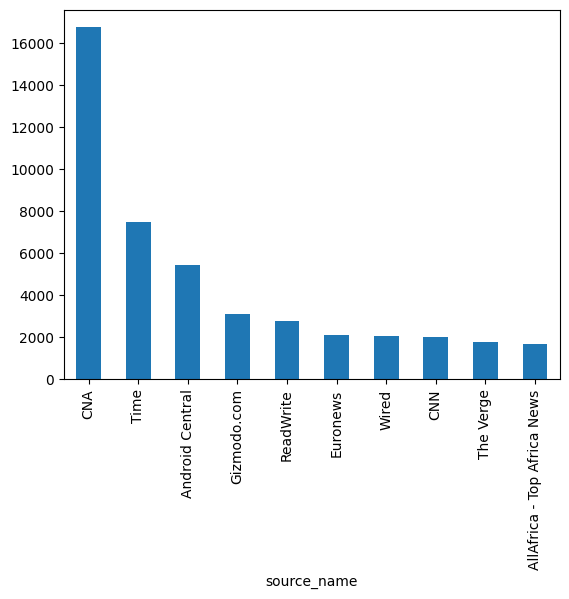

In [22]:
# Top and bottom 10 websites with the largest count of news articles
top_10_websites = merged_data['source_name'].value_counts().head(10)
bottom_10_websites = merged_data['source_name'].value_counts().tail(10)

top_10_websites.plot(kind = 'bar')
bottom_10_websites.plot(kind = 'bar')

In [23]:
# 2. Websites with the highest numbers of visitors traffic
top_traffic_websites = traffic_data.groupby('Domain')['GlobalRank'].mean().sort_values().head(10)


In [24]:
# 3. Countries with the highest number of news media organizations
countries_with_most_organizations = domains_location['Country'].value_counts().head()



In [25]:
# 4. Countries that have many articles written about them
countries_with_many_articles = merged_data['Country'].value_counts().head()




In [26]:
# 5. Websites that reported about specific regions (Africa, US, China, EU, Russia, Ukraine, Middle East)
regions = {
    'Africa': ['Africa'],
    'US': ['US'],
    'China': ['China'],
    'EU': ['UK', 'France', 'Germany', 'Italy', 'Spain'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Saudi Arabia', 'United Arab Emirates', 'Turkey', 'Israel', 'Iraq', 'Iran']
}

websites_reporting_about_regions = {}
for region, countries in regions.items():
    websites_reporting_about_regions[region] = merged_data[merged_data['Country'].isin(countries)]['source_name'].value_counts()


In [27]:
#Websites with the highest count of positive, neutral, and negative sentiment
sentiment_stats = merged_data.groupby('source_name')['title_sentiment'].describe()

In [28]:
#Impact of using mean/average and median sentiment
sentiment_impact = sentiment_stats[['mean', '50%']].plot(kind='bar', figsize=(10, 6), title="Impact of Mean/Average and Median Sentiment")
plt.xlabel("Websites")
plt.ylabel("Sentiment")
plt.show()

KeyError: "None of [Index(['mean', '50%'], dtype='object')] are in the [columns]"

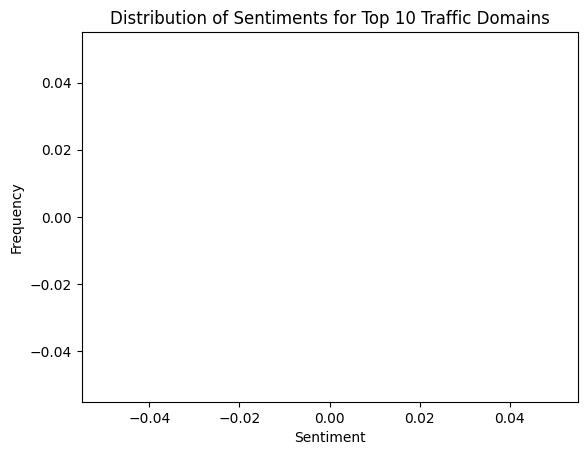

In [29]:
# 8. Distribution of sentiments for top 10 domains by visitors traffic
top_10_traffic_domains = top_traffic_websites.index.tolist()
top_10_traffic_sentiments = merged_data[merged_data['source_name'].isin(top_10_traffic_domains)]['title_sentiment']
sns.histplot(top_10_traffic_sentiments, kde=True)
plt.title("Distribution of Sentiments for Top 10 Traffic Domains")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

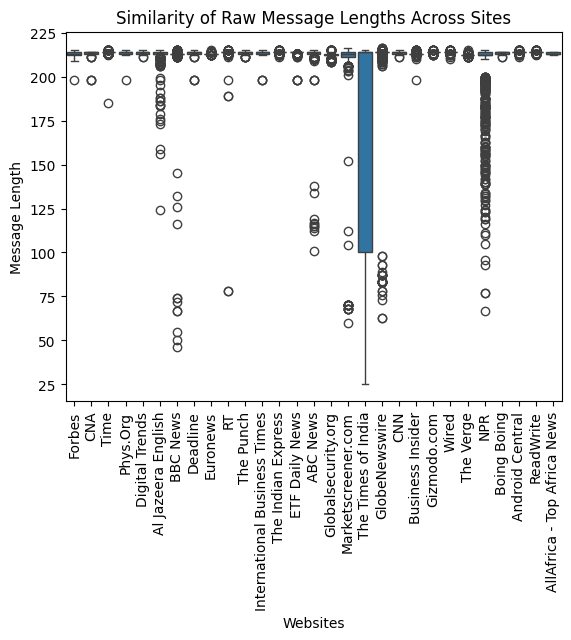

In [30]:
# 9. Similarity of raw message lengths across sites
sns.boxplot(x='source_name', y=merged_data['content'].str.len(), data=merged_data)
plt.xticks(rotation=90)
plt.title("Similarity of Raw Message Lengths Across Sites")
plt.xlabel("Websites")
plt.ylabel("Message Length")
plt.show()

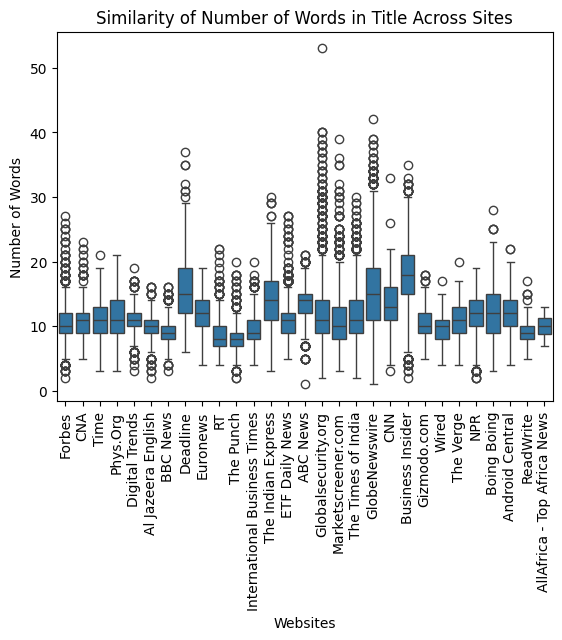

In [31]:
# 10. Similarity of number of words in the title across sites
merged_data['title_word_count'] = merged_data['title'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='source_name', y='title_word_count', data=merged_data)
plt.xticks(rotation=90)
plt.title("Similarity of Number of Words in Title Across Sites")
plt.xlabel("Websites")
plt.ylabel("Number of Words")
plt.show()



In [32]:
# 11. Impact of frequent news reporting and sentiment to the website’s global ranking
merged_data['num_reports'] = merged_data['source_name'].map(merged_data['source_name'].value_counts())
scatter_data = merged_data.groupby('source_name').agg({'GlobalRank': 'mean', 'title_sentiment': 'median', 'num_reports': 'first'})

plt.scatter(scatter_data['num_reports'], scatter_data['GlobalRank'], c=scatter_data['title_sentiment'], cmap='coolwarm')
plt.colorbar(label='Median Sentiment')
plt.title("Impact of Frequent News Reporting and Sentiment on Global Ranking")
plt.xlabel("Number of Reports")
plt.ylabel("Global Ranking")
plt.show()

KeyError: "Column(s) ['GlobalRank'] do not exist"